In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from statsmodels.tsa.arima.model import ARIMA
import warnings

# esaid hasan

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('creditcard.csv') 

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
x=df.iloc[:,:-1]

In [8]:
y=df.iloc[:,-1]

In [9]:
df.shape

(284807, 31)

In [10]:
x.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

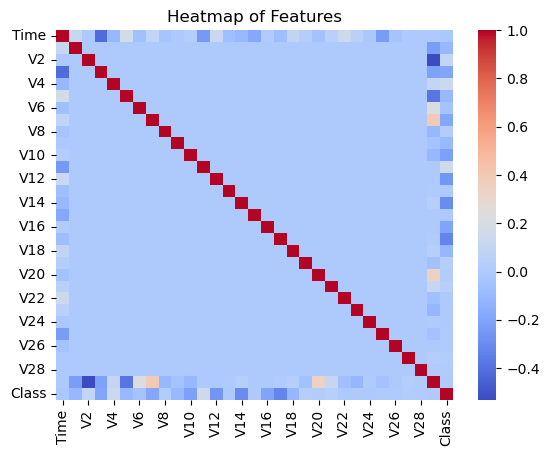

In [13]:
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt=".2f")

plt.title("Heatmap of Features")
plt.show()

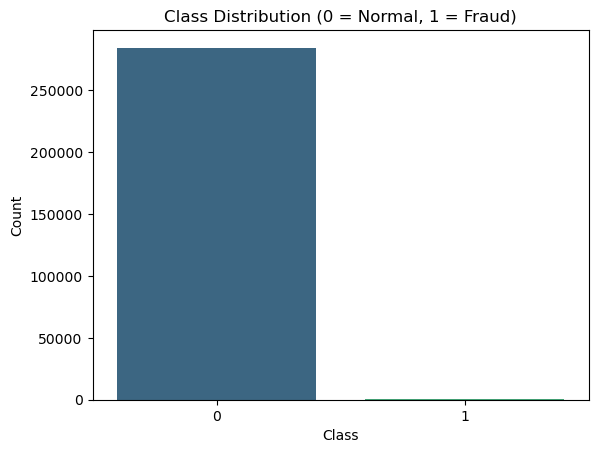

In [14]:
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Class Distribution (0 = Normal, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# ziad saad and mohamed samy

# handeling impalance data

In [15]:
sm = SMOTE(random_state=42)
x, y= sm.fit_resample(x, y)

In [16]:
class_counts = y.value_counts()
class_counts

0    284315
1    284315
Name: Class, dtype: int64

Text(0.5, 0, 'Class')

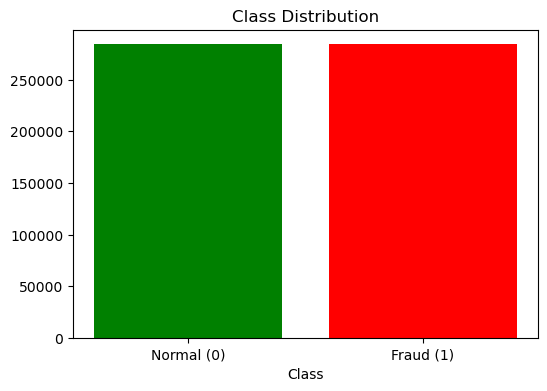

In [17]:
plt.figure(figsize=(6,4))
plt.bar(class_counts.index, class_counts.values, color=['green', 'red'])
plt.xticks([0, 1], ['Normal (0)', 'Fraud (1)'])
plt.title('Class Distribution')
plt.xlabel('Class')


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [19]:
x_train.shape[0]/(x_train.shape[0]+x_test.shape[0])

0.7

In [20]:
x_test.shape[0]/(x_train.shape[0]+x_test.shape[0])

0.3

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
x_train

array([[ 0.30506747,  0.1261111 ,  0.56574379, ...,  0.64695855,
         0.02802288, -0.43087769],
       [-0.71434962,  0.25573173, -0.1521955 , ...,  0.49453567,
         0.50965853, -0.43297155],
       [ 0.72083908,  0.23708776, -0.80132577, ...,  0.16790572,
         0.86757741, -0.09443197],
       ...,
       [-0.93092308,  0.17786993, -0.29779453, ...,  0.56004868,
         0.22835945,  0.37126562],
       [-0.1667546 ,  0.42670028, -0.25314972, ..., -0.21500896,
        -0.57033098, -0.41627945],
       [-0.23770058,  0.68060059, -0.74326955, ..., -0.08582833,
        -0.00798987,  0.07830538]])

# ahmed abdel moneim

# Model XGBClassifier

In [23]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [24]:
y_pred = xgb_model.predict(x_test)

In [25]:
y_pred_train= xgb_model.predict(x_train)

In [26]:
print("Classification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [27]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[85123    26]
 [    0 85440]]


In [28]:
print("ROC-AUC Score for test:", roc_auc_score(y_test, y_pred))

ROC-AUC Score for test: 0.9998473264512795


In [29]:
print("ROC-AUC Score for train:", roc_auc_score(y_train, y_pred_train))

ROC-AUC Score for train: 1.0


# hamed gabriel

# Time Series Analysis


In [29]:
df['Hour'] = df['Time'] // 3600 

Hour
0.0     3963
1.0     2217
2.0     1576
3.0     1821
4.0     1082
5.0     1681
6.0     1831
7.0     3368
8.0     5179
9.0     7878
10.0    8288
11.0    8517
12.0    7732
13.0    7585
14.0    8029
15.0    7836
16.0    7786
17.0    7882
18.0    8607
19.0    7994
20.0    8980
21.0    9895
22.0    8977
23.0    6082
24.0    3732
25.0    2003
26.0    1752
27.0    1671
28.0    1127
29.0    1309
30.0    2270
31.0    3875
32.0    5097
33.0    7960
34.0    8310
35.0    8339
36.0    7688
37.0    7780
38.0    8541
39.0    8625
40.0    8667
41.0    8284
42.0    8432
43.0    7655
44.0    7776
45.0    7808
46.0    6464
47.0    4856
dtype: int64


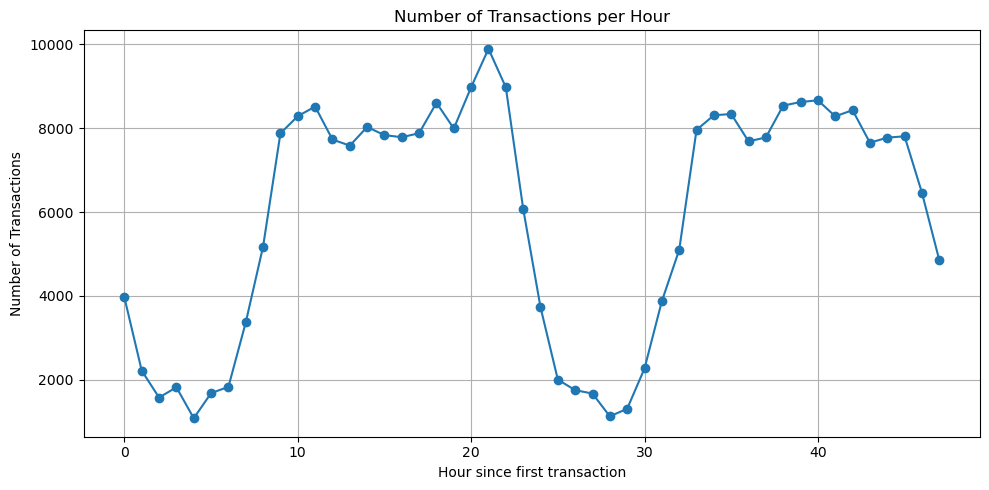

In [30]:
transactions_per_hour = df.groupby('Hour').size()
print(transactions_per_hour)
# رسم عدد المعاملات حسب الساعة
plt.figure(figsize=(10, 5))
plt.plot(transactions_per_hour.index, transactions_per_hour.values, marker='o')
plt.title('Number of Transactions per Hour')
plt.xlabel('Hour since first transaction')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()


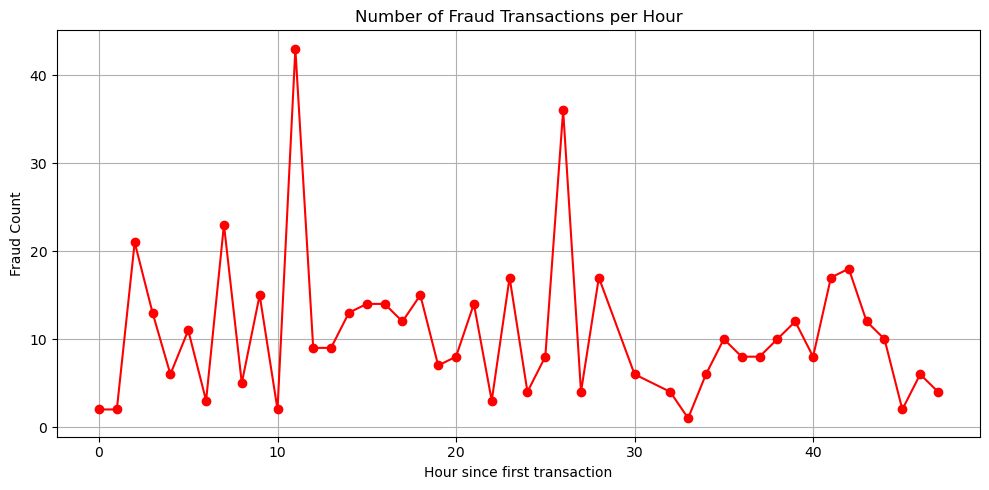

In [31]:
# تصفية الاحتيالات فقط
fraud_df = df[df['Class'] == 1]

# عدد حالات الاحتيال في كل ساعة
fraud_per_hour = fraud_df.groupby('Hour').size()

# رسم عدد حالات الاحتيال
plt.figure(figsize=(10, 5))
plt.plot(fraud_per_hour.index, fraud_per_hour.values, color='red', marker='o')
plt.title('Number of Fraud Transactions per Hour')
plt.xlabel('Hour since first transaction')
plt.ylabel('Fraud Count')
plt.grid(True)
plt.tight_layout()
plt.show()


# abdullah hassan

#  ARIMA Model


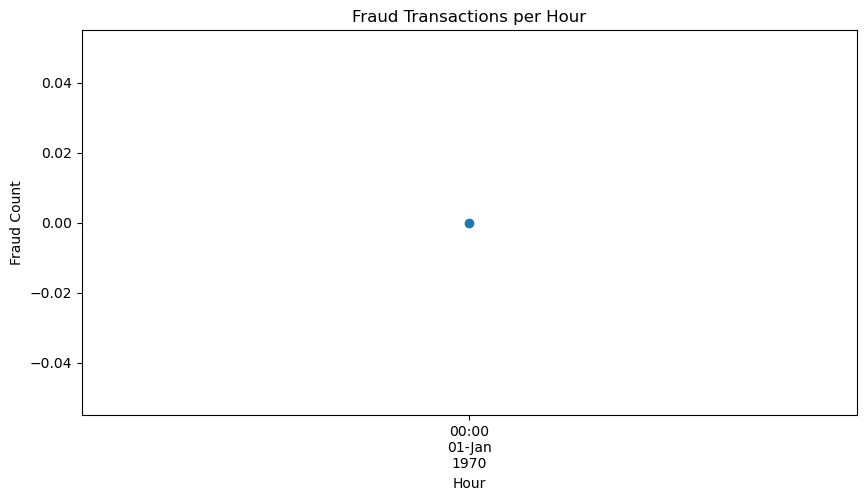

In [32]:

fraud = df[df['Class'] == 1]

# تجميع عدد عمليات الاحتيال حسب الساعة
fraud_series = fraud.groupby('Hour').size()

# التأكد من وجود كل الساعات بترتيب
fraud_series = fraud_series.asfreq('H', fill_value=0)

# عرض السلسلة الأصلية
plt.figure(figsize=(10, 5))
fraud_series.plot(title="Fraud Transactions per Hour", marker='o')
plt.xlabel("Hour")
plt.ylabel("Fraud Count")
plt.show()


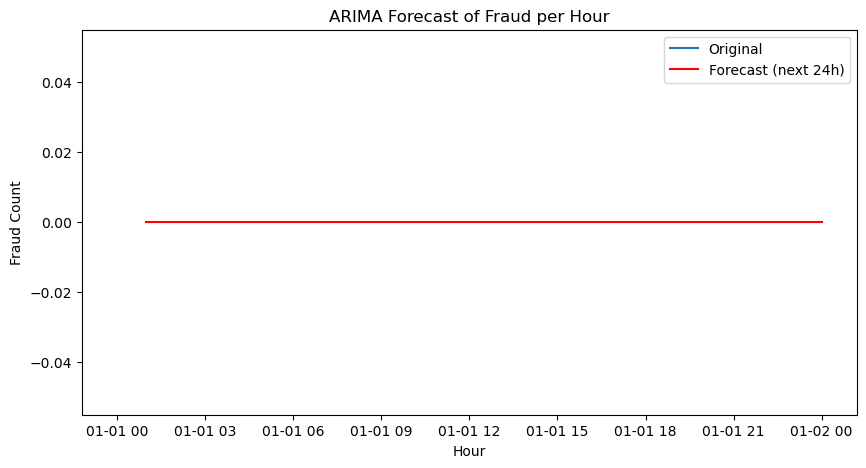

In [33]:

# تدريب النموذج (ARIMA(p,d,q))
model = ARIMA(fraud_series, order=(2,1,2))  # يمكن تغيير القيم لاحقًا
model_fit = model.fit()

# توقع 24 ساعة قادمة
forecast = model_fit.forecast(steps=24)

# رسم التوقع
plt.figure(figsize=(10, 5))
plt.plot(fraud_series, label='Original')
plt.plot(forecast.index, forecast, label='Forecast (next 24h)', color='red')
plt.title("ARIMA Forecast of Fraud per Hour")
plt.xlabel("Hour")
plt.ylabel("Fraud Count")
plt.legend()
plt.show()



# mohamed samy


In [34]:
labels=x.columns
labels

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [35]:
def predict_frude():
    try:
        # جمع البيانات المدخلة من الحقول
        input_data = [float(entry.get()) for entry in entries]
        input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
        input_data_std = scaler.transform(input_data_as_numpy_array)
        
        # التنبؤ
        prediction = xgb_model.predict(input_data_std)
        prediction_label =prediction
        
        # عرض النتيجة
        if prediction_label == 0:
            messagebox.showinfo("النتيجة", "not frude")
        else:
            messagebox.showinfo("النتيجة", "frude")
    except Exception as e:
        messagebox.showerror("خطأ", f"يرجى إدخال بيانات صحيحة.\n{e}")

In [ ]:
import customtkinter as ctk
from tkinter import messagebox
ctk.set_appearance_mode("dark")
ctk.set_default_color_theme("blue")
app = ctk.CTk()
app.title("frude detection")
app.geometry("500x700")
# إنشاء إطار يحتوي على شريط تمرير
frame = ctk.CTkScrollableFrame(app, width=500, height=700)
frame.pack(pady=10)


entries = []
for label_text in labels:
    label = ctk.CTkLabel(frame, text=label_text)
    label.pack(pady=5)
    entry = ctk.CTkEntry(frame, width=300)
    entry.pack(pady=5)
    entries.append(entry)
predict_button = ctk.CTkButton(frame, text="frude detection =", command=predict_frude)
predict_button.pack(pady=20)

# تشغيل التطبيق
app.mainloop()

In [37]:
import pickle
with open('xgb_model.pkl','wb')as file:
    
    pickle.dump(xgb_model,file)


In [38]:
import customtkinter as ctk
from tkinter import messagebox
from sklearn.preprocessing import StandardScaler
import pickle
import numpy as np
with open('xgb_model.pkl','rb') as file:
    xgb_model=pickle.load(file)

scaler = StandardScaler()
ctk.set_appearance_mode("dark")
ctk.set_default_color_theme("blue")
app = ctk.CTk()
app.title("frude detection")
app.geometry("500x700")
# إنشاء إطار يحتوي على شريط تمرير
frame = ctk.CTkScrollableFrame(app, width=500, height=700)
frame.pack(pady=10)


def predict_frude():
    try:
        # جمع البيانات المدخلة من الحقول
        input_data = [float(entry.get()) for entry in entries]
        input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
        input_data_std = scaler.fit_transform(input_data_as_numpy_array)
        
        # التنبؤ
        prediction = xgb_model.predict(input_data_std)
        prediction_label =prediction
        
        # عرض النتيجة
        if prediction_label == 0:
            messagebox.showinfo("النتيجة", "not frude")
        else:
            messagebox.showinfo("النتيجة", "frude")
    except Exception as e:
        messagebox.showerror("خطأ", f"يرجى إدخال بيانات صحيحة.\n{e}")
        
labels=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
entries = []
for label_text in labels:
    label = ctk.CTkLabel(frame, text=label_text)
    label.pack(pady=5)
    entry = ctk.CTkEntry(frame, width=300)
    entry.pack(pady=5)
    entries.append(entry)
predict_button = ctk.CTkButton(frame, text="frude detection =", command=predict_frude)
predict_button.pack(pady=20)

app.mainloop()      